In [1]:
pip install albumentations opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


In [2]:
import zipfile
import os

# Path ke file ZIP
zip_file_path = "dataset dami 12.zip"  

# Path untuk ekstraksi
extract_to_path = "extracted_data_folder" 
os.makedirs(extract_to_path, exist_ok=True) 

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Dataset berhasil diekstrak ke: {extract_to_path}")


Dataset berhasil diekstrak ke: extracted_data_folder


In [3]:
dataset_path = "extracted_data_folder/dataset"


In [6]:
import os

# Path dataset
dataset_path = "extracted_data_folder/dataset"

# Periksa kategori
categories = os.listdir(dataset_path)
print(f"Kategori yang ditemukan: {categories}")

# Hitung jumlah file di setiap kategori
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        num_files = len(os.listdir(category_path))
        print(f"Kategori '{category}' memiliki {num_files} file.")


Kategori yang ditemukan: ['test_black', 'test_color', 'train_black', 'train_color']
Kategori 'test_black' memiliki 7 file.
Kategori 'test_color' memiliki 7 file.
Kategori 'train_black' memiliki 57 file.
Kategori 'train_color' memiliki 57 file.


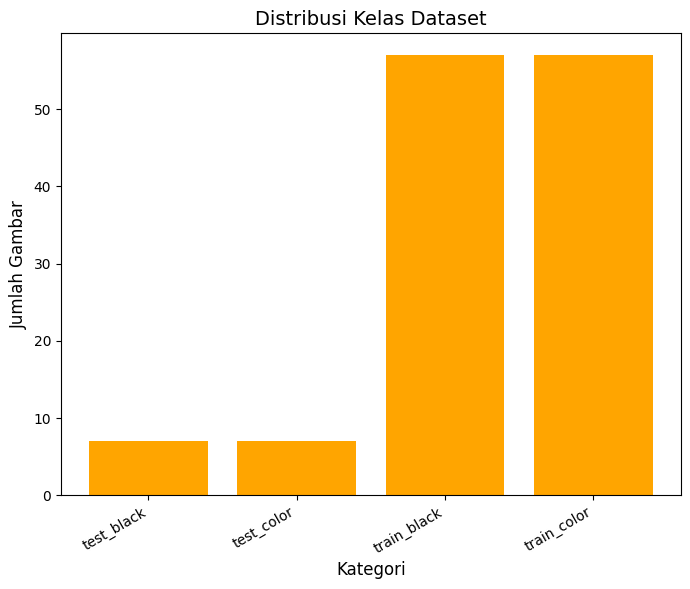

In [7]:
import matplotlib.pyplot as plt

# Data distribusi
class_counts = {cat: len(os.listdir(os.path.join(dataset_path, cat)))
                for cat in categories if os.path.isdir(os.path.join(dataset_path, cat))}

# Plot distribusi
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("Distribusi Kelas Dataset", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()


In [8]:
from PIL import Image

dimensions = []
formats = []


for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                with Image.open(img_path) as img:
                    dimensions.append(img.size)  # (width, height)
                    formats.append(img.format)  
            except Exception as e:
                print(f"Error membaca file: {img_path}, {e}")


print(f"Dimensi gambar unik: {set(dimensions)}")
print(f"Format gambar unik: {set(formats)}")


Dimensi gambar unik: {(1440, 3600)}
Format gambar unik: {'PNG'}


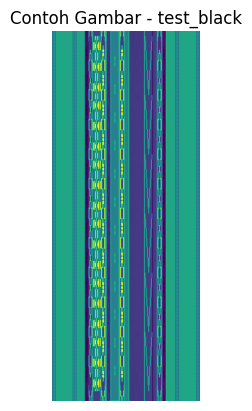

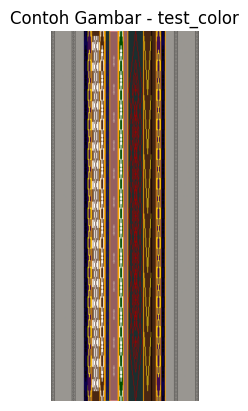

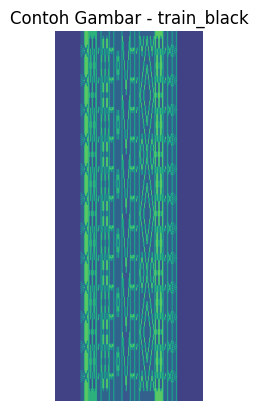

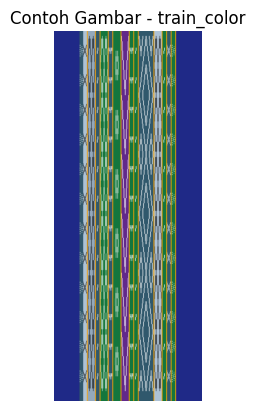

In [9]:
import matplotlib.pyplot as plt
import numpy as np

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        sample_image_path = os.path.join(category_path, os.listdir(category_path)[0])
        with Image.open(sample_image_path) as img:
            plt.figure()
            plt.imshow(np.array(img))
            plt.title(f"Contoh Gambar - {category}")
            plt.axis('off')
            plt.show()
